original code: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #Print null values of each columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

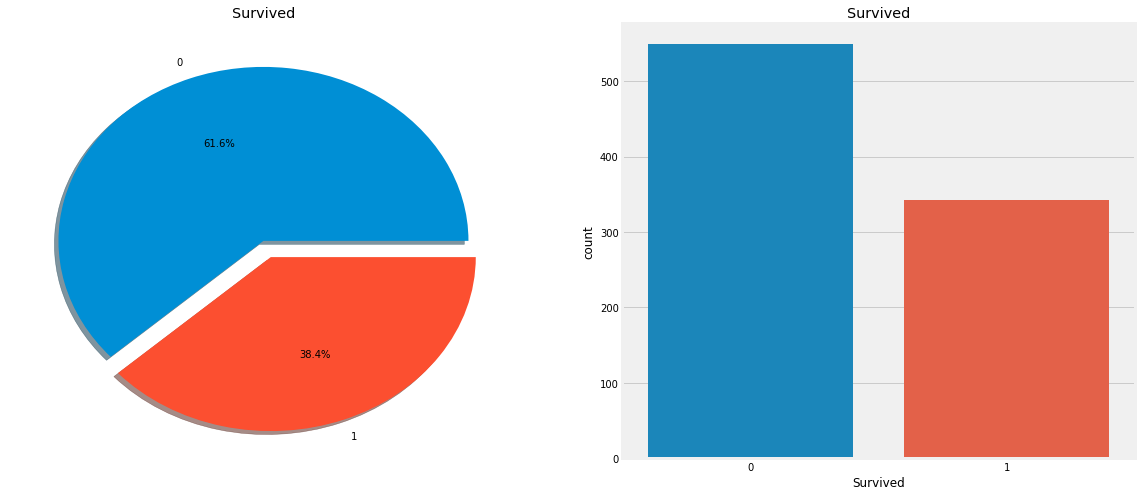

In [5]:
#Make plots to visualize survive ratio
f, ax =plt.subplots(1, 2, figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

In [6]:
#Analyze 'Categorial' Feature: sex
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

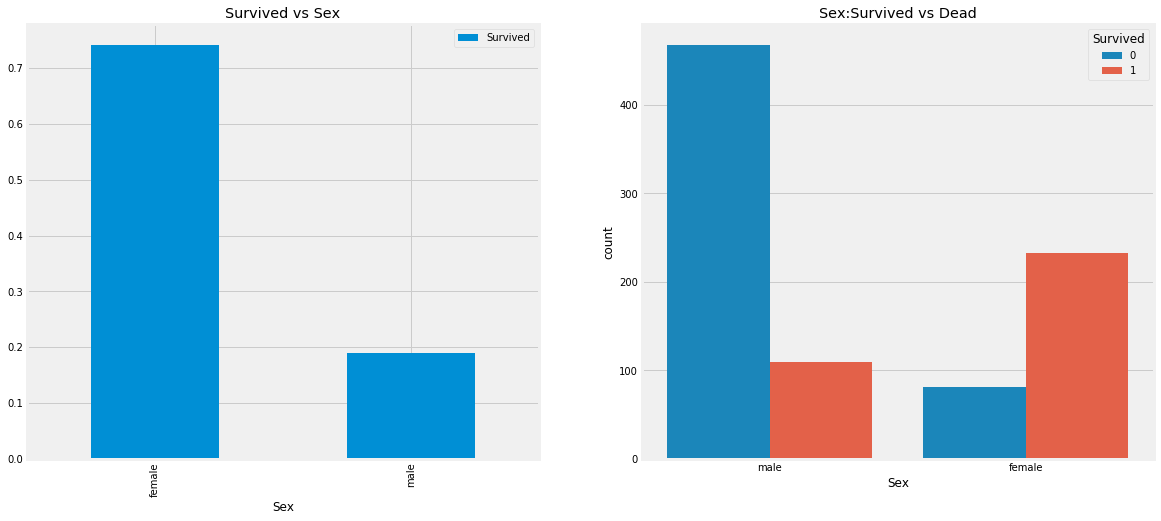

In [7]:
#Visualize data to analyze the feature: Sex
f,ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

In [8]:
#Analyze 'Ordinary' Feature: Pclass
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


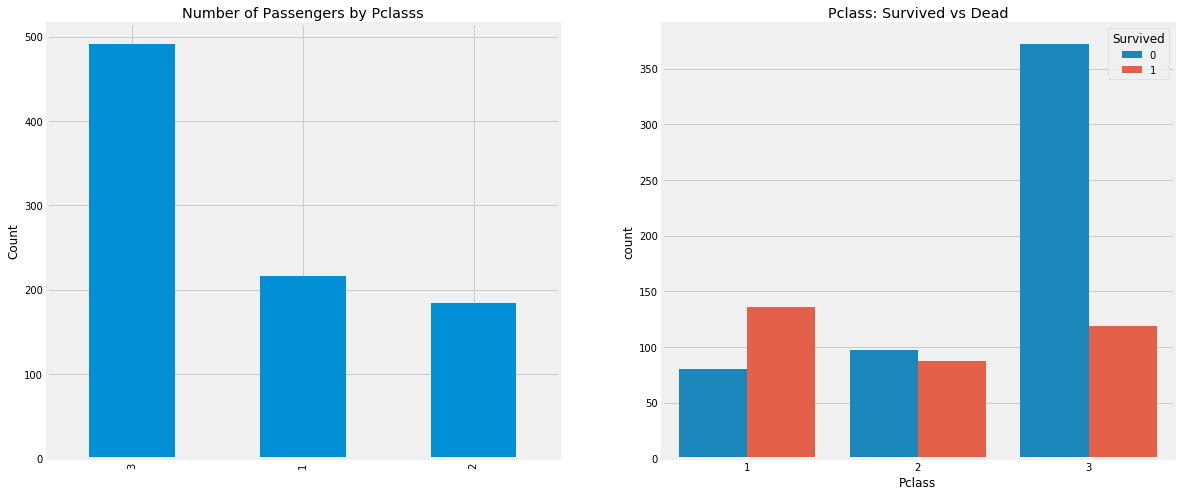

In [9]:
#Visualize data to analyze the feature: Pclass
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by Pclasss')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

In [10]:
#Analyze the Categorial and Ordinary Features together: Sex & Pclass
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

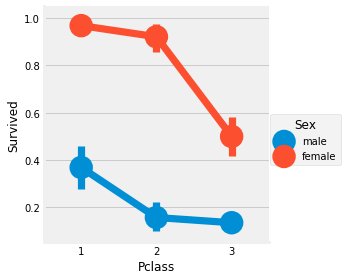

In [11]:
#Visualize the analysis
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [12]:
#Analyze 'Continuous' Feature: Age
print(f'Oldest: \t {data["Age"].max():.2f} yrs old')
print(f'Youngest: \t {data["Age"].min():.2f} yrs old')
print(f'Average Age: \t {data["Age"].mean():.2f} yrs old')

Oldest: 	 80.00 yrs old
Youngest: 	 0.42 yrs old
Average Age: 	 29.70 yrs old


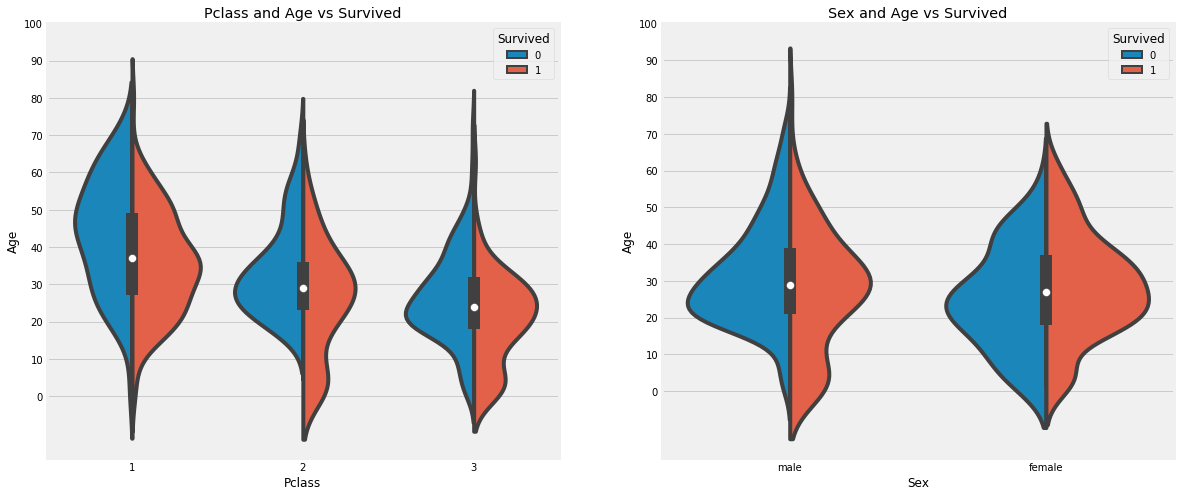

In [13]:
#Visualize the feature 'Age' comparing to two different features: Sex and Pclass
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

In [14]:
#To replace NaN values of the Age Feature, identify each passenger's salutation.
#NaN values will be replaced after inferring the gender and age based on the salutations.
data['Initial']=0

for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
#Integrate some salutations with small numbers into 'Miss', 'Mr', 'Mrs', or 'Other'
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], \
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], \
                        inplace=True)

data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [16]:
#Filling NaN Ages based on the salutations
data.loc[(data.Age.isnull()) & (data.Initial == "Mr"),     'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == "Mrs"),    'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == "Master"), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == "Miss"),   'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == "Other"),  'Age'] = 46


In [17]:
#Check NaN left or not
data.Age.isnull().any() #should be False

False

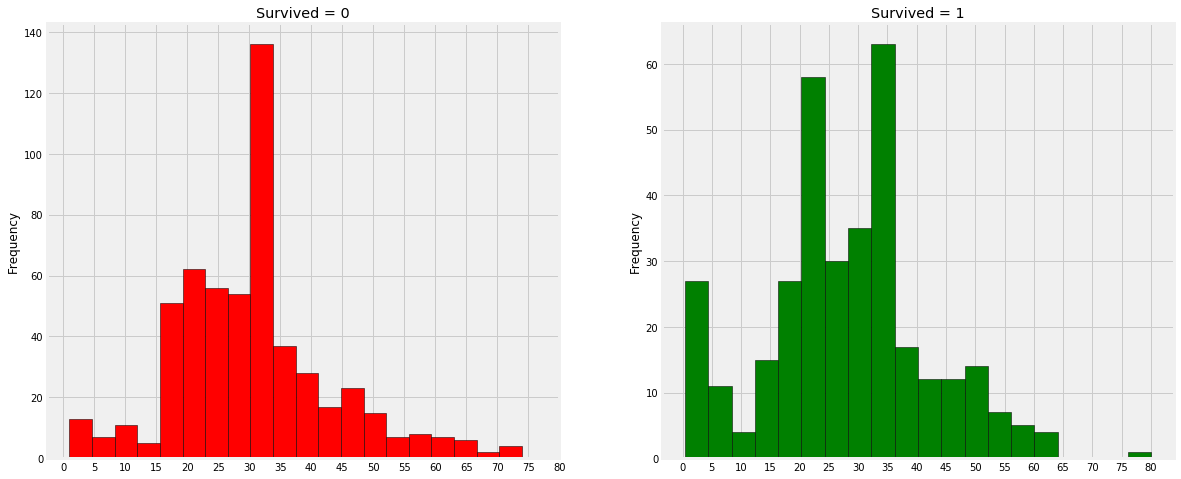

In [18]:
#Visualize the feature 'Age' based on survival
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

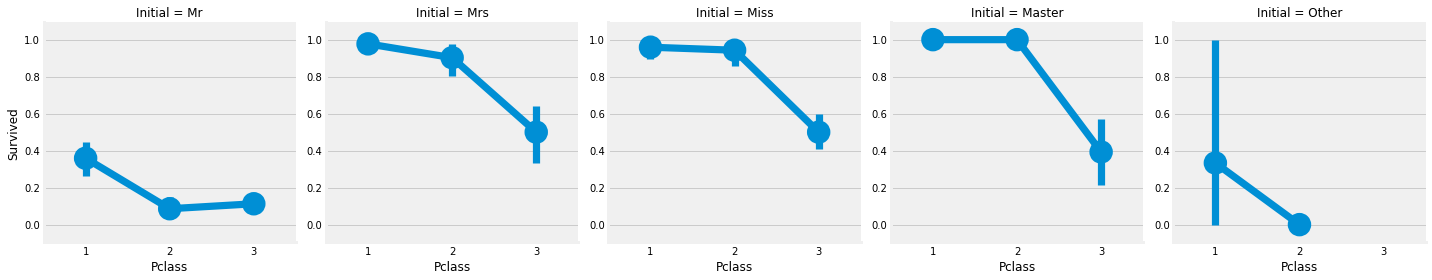

In [19]:
#Visualize based on the salutations
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)

plt.show()

In [20]:
#Analyze the 'Sex' and 'Pclass' features with the 'Categorial' values, Embarked.
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

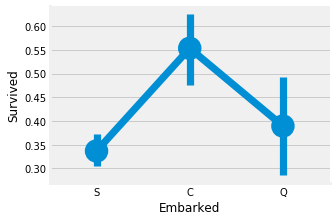

In [21]:
#Visualize the feature: Embarked
sns.factorplot('Embarked', 'Survived', data=data)

fig=plt.gcf()
fig.set_size_inches(5, 3)

plt.show()

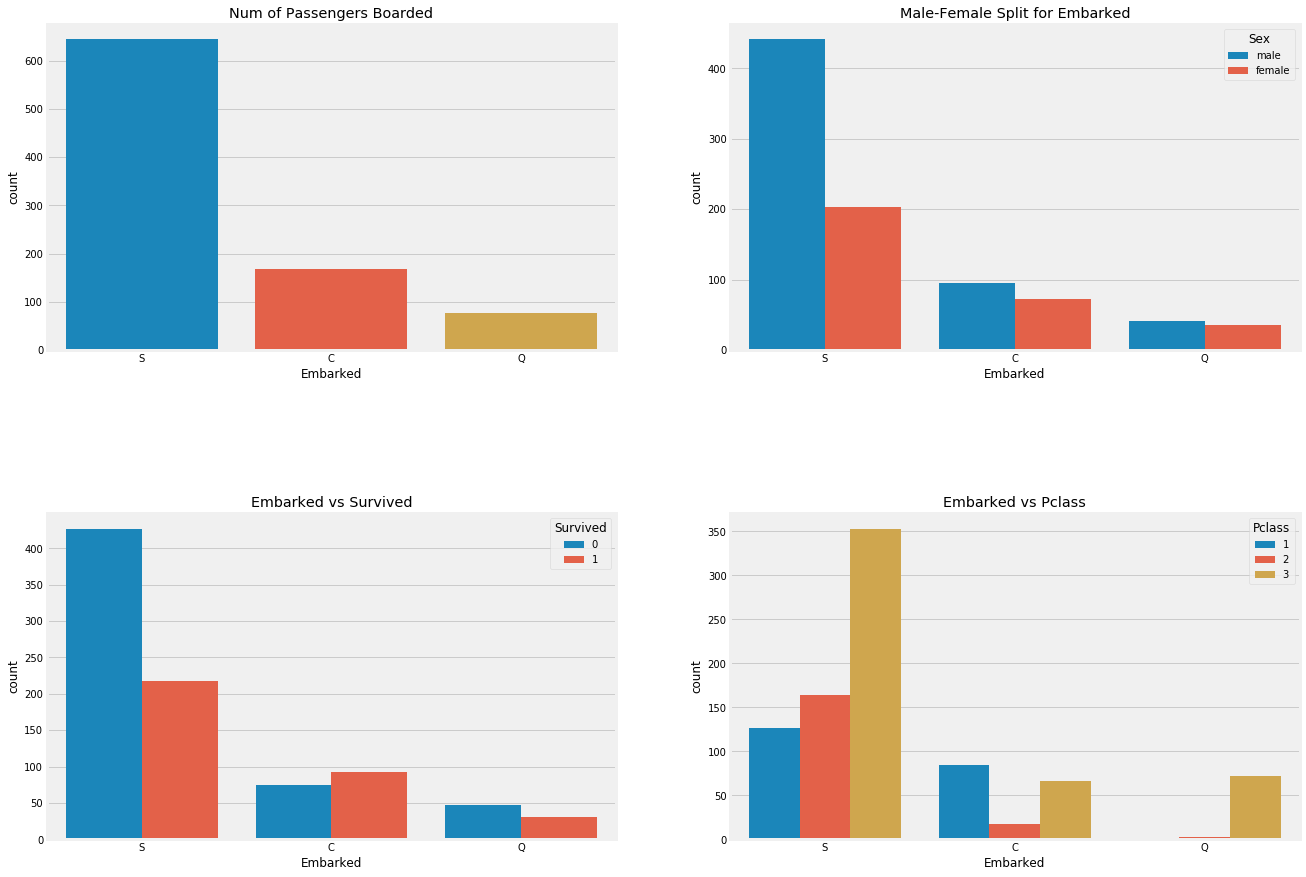

In [22]:
#Visualize the features, 'Embarked', integrate with 'Sex', 'Pclass'
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title("Num of Passengers Boarded")

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title("Male-Female Split for Embarked")

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title("Embarked vs Survived")

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title("Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

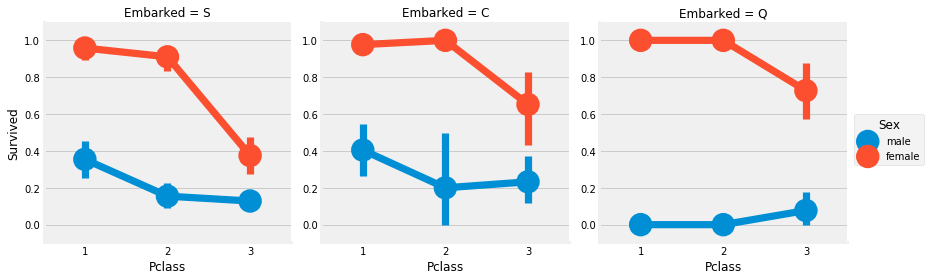

In [23]:
#Visualize the features 'Embarked', 'Pclass', and 'Sex'
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)

plt.show()

In [24]:
#Replace NaN values of the Embarked feature
#Most of passengers boarded from 'S' <- replace to it
data['Embarked'].fillna('S', inplace=True)

#Check NaN left or not
data.Embarked.isnull().any() #should be False

False

In [25]:
#Analyze 'Discrete' feature: SibSip (represents whether a person is alone or with his family members.)
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


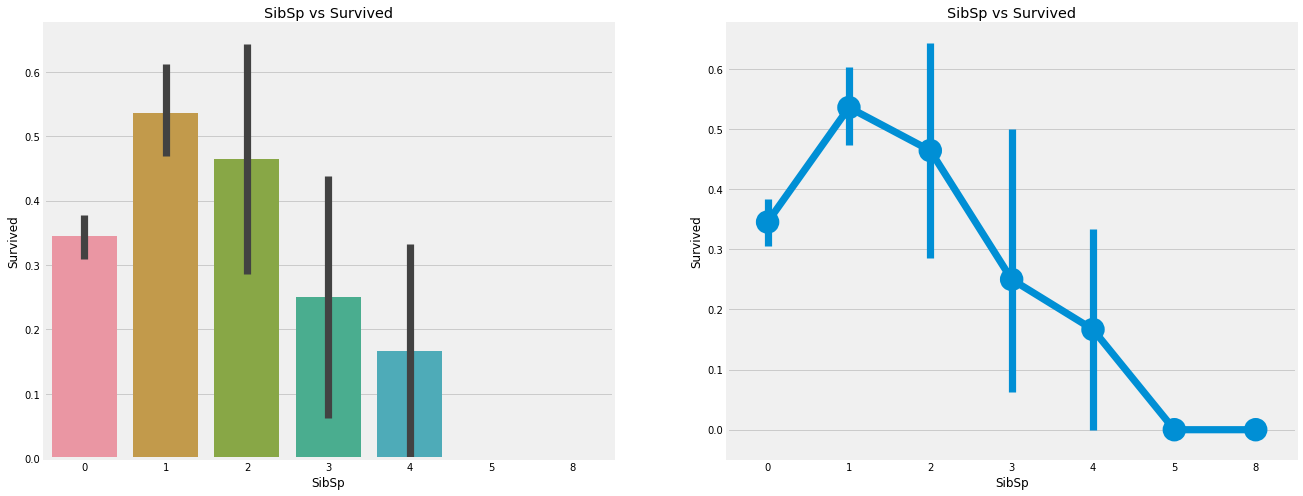

In [26]:
#Visualize the feature SibSp
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)

plt.show()

In [27]:
#Analyze the feature 'SibSp' with 'Pclass'
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [28]:
#Analyze the feature 'Parch' with 'Pclass'
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


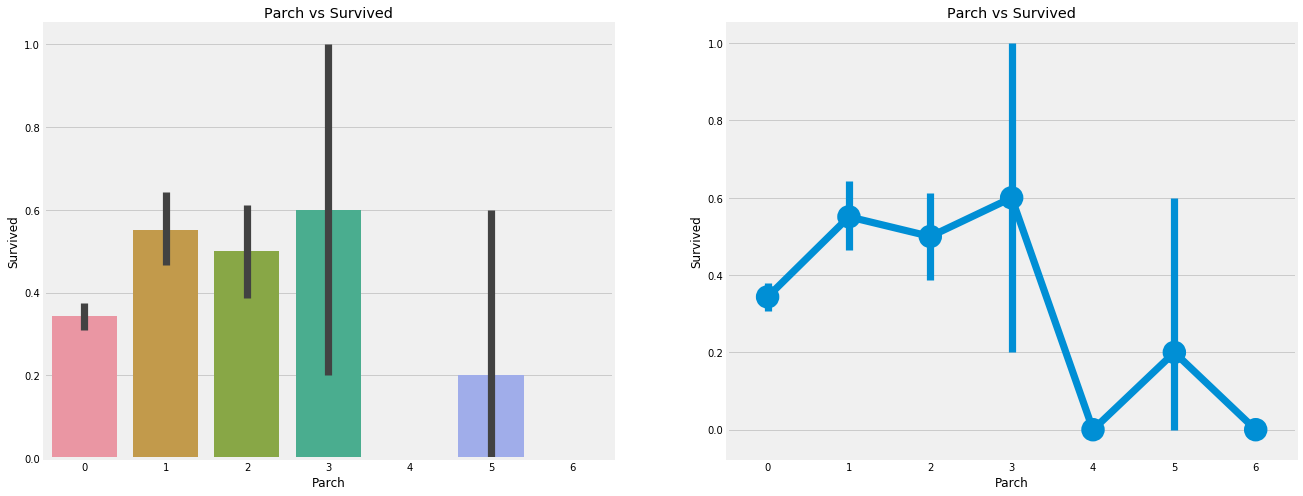

In [29]:
#Visualize the feature 'Parch'
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)

plt.show()

In [30]:
#Analyze 'Continuous' feature: Fare
print(f"Highest Fare: \t {data['Fare'].max()}")
print(f"Lowest Fare: \t {data['Fare'].min()}")
print(f"Fare Average: \t {data['Fare'].mean()}")

Highest Fare: 	 512.3292
Lowest Fare: 	 0.0
Fare Average: 	 32.2042079685746


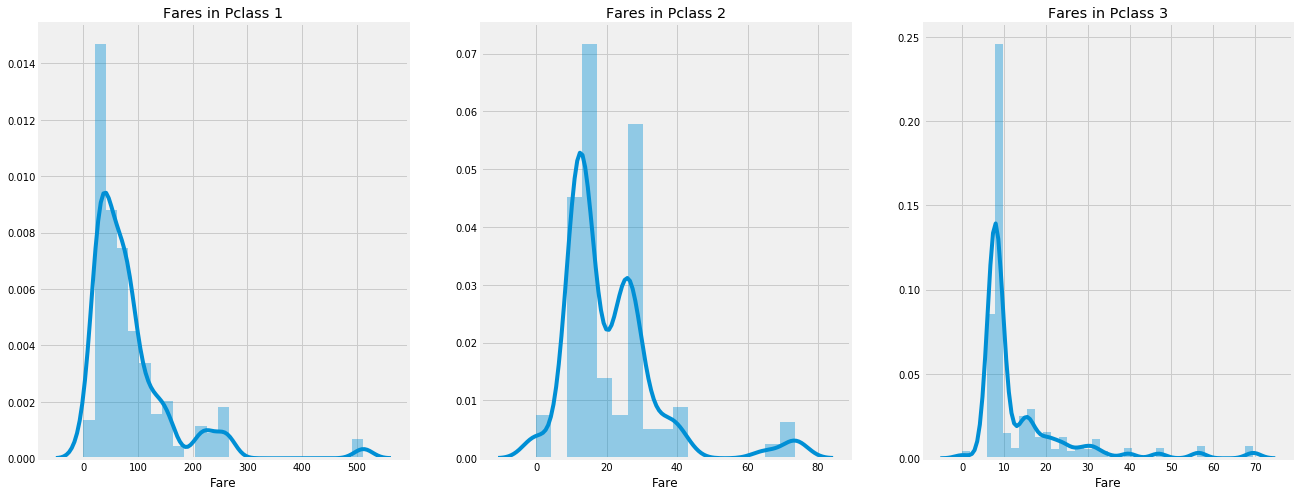

In [31]:
#Visualize the continuous feature, 'Fare', compare with 'Pclass'
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

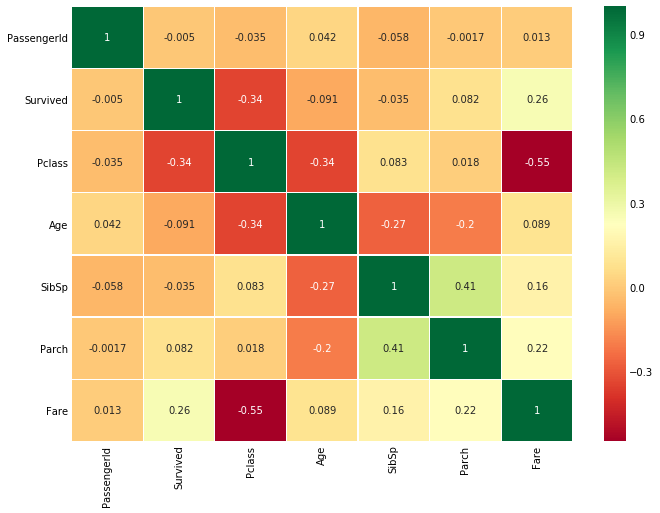

In [32]:
#Visualize the correlation between the whole features
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

fig=plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

## Part2: Feature Engineering and Data Cleaning

In [33]:
#Categorized the continuous feature, Age
#Choose between 'binning' or 'normalisation'
#Binning
data['Age_band']=0

data.loc[data['Age']<=16,                      'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64,                       'Age_band']=4

data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [34]:
#Analyze the new continuous feature: Age_band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


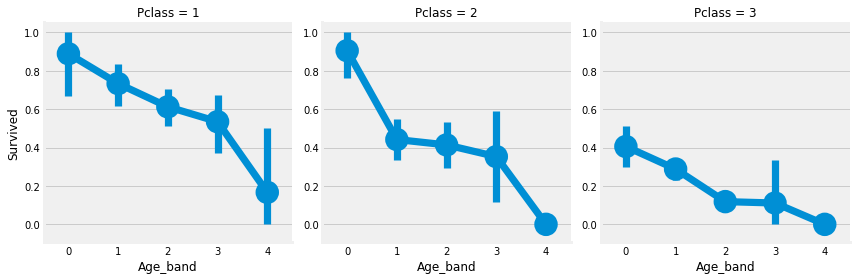

In [35]:
#Visualize the continous feature, Age_band, sort by 'Pclass'
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')

plt.show()

In [36]:
#Summarized features 'Parch' and 'SibSp' into 'Family_Size' and 'Alone'
data['Family_Size'] = 0 
data['Family_Size'] = data['Parch'] + data['SibSp']

data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1 #if data.Family_Size=0 -> Alone

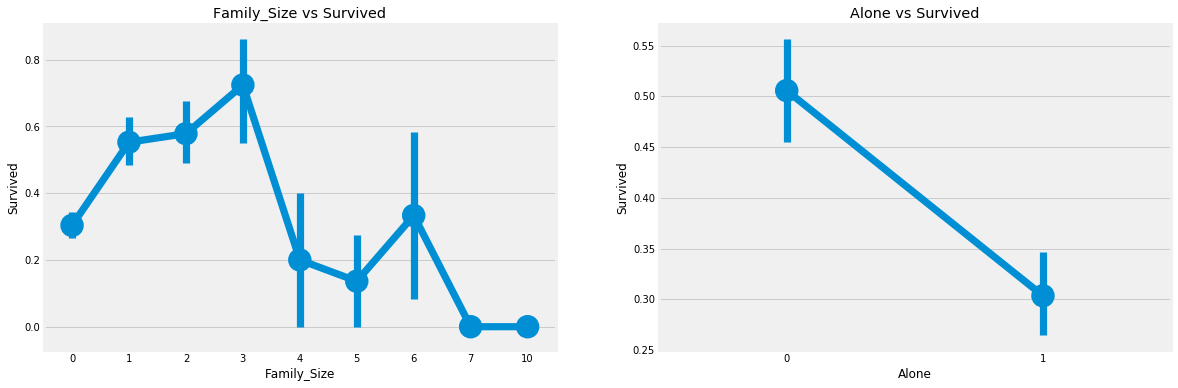

In [37]:
#Visualize the features
f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

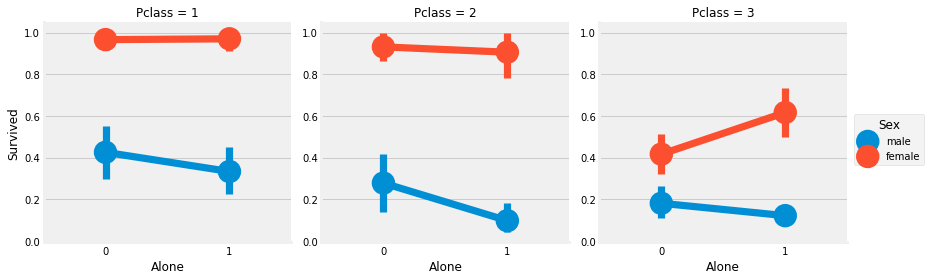

In [38]:
#Visualize the feature 'Alone' sort by 'Pclass'
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')

plt.show()

In [39]:
#Categorized the 'Continuous' feature, 'Fare', to ordinal value
#Will use pandas.qcut
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [40]:
#Keep Cateogrized with binning
data['Fare_cat']=0

data.loc[data['Fare'] <= 7.91,                               'Fare_cat'] = 0
data.loc[(data['Fare'] >7.91)   & (data['Fare'] <= 14.454),  'Fare_cat'] = 1
data.loc[(data['Fare'] >14.454) & (data['Fare'] <= 31),      'Fare_cat'] = 2
data.loc[(data['Fare'] >31)     & (data['Fare'] <= 513.329), 'Fare_cat'] = 3

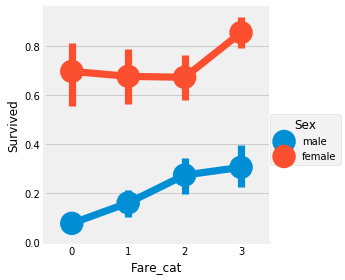

In [41]:
#Visualized the new feature, 'Fare_cat'
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')

plt.show()

In [42]:
#Converting String Values into Numeric
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

In [43]:
#Drop the unneeded features
#(Name, Age, Ticket, Fare, Cabin, Fare_Range, PassengerId) will be dropped
dropList=['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId']
data.drop(dropList, axis=1, inplace=True)

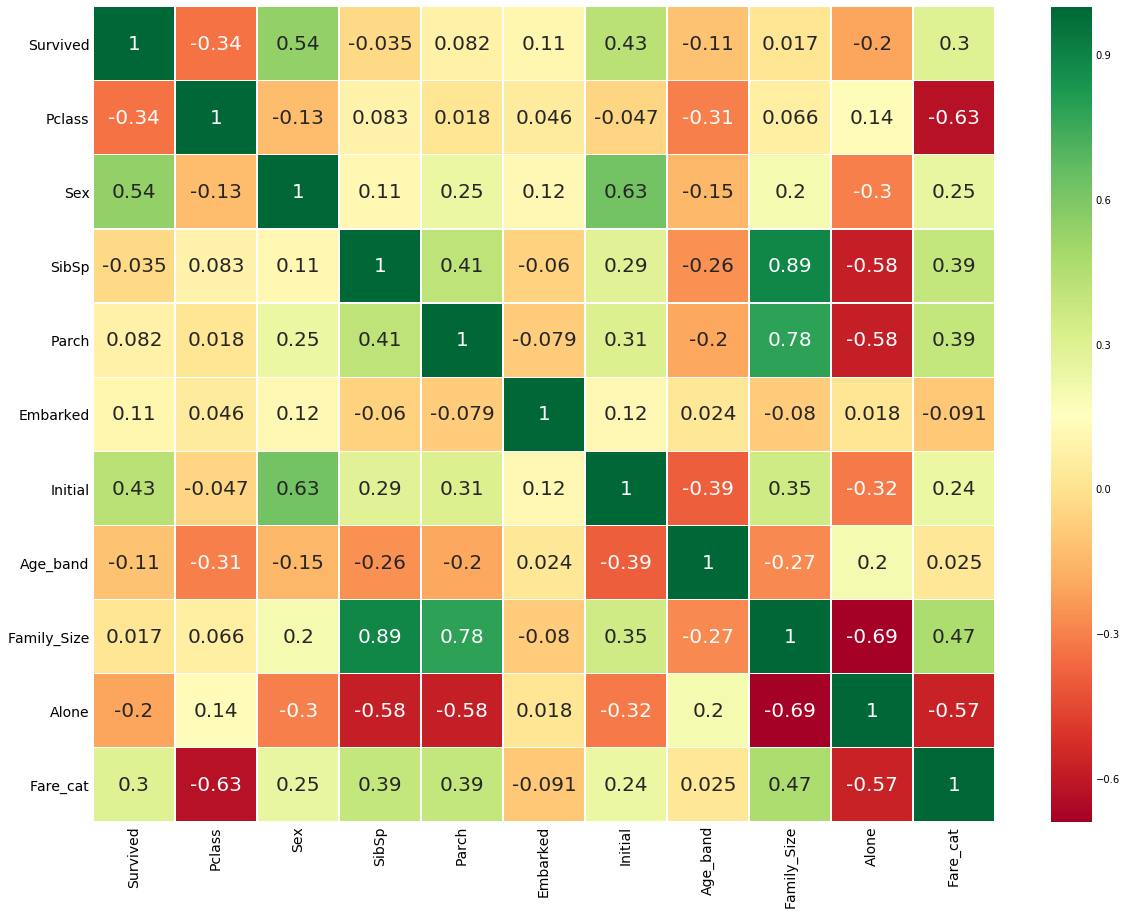

In [44]:
#Visualize the remained features
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})

fig=plt.gcf()
fig.set_size_inches(18, 15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Part3: Predictive Modeling

In [45]:
#Several Classification Algorithms will be used
# 1)Logistic Regression
# 2)Support Vector Machines(Linear and radial)
# 3)Random Forest
# 4)K-Nearest Neighbours
# 5)Naive Bayes
# 6)Decision Tree
# 7)Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [46]:
#Split the data
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

In [47]:
#Model 1: Radial Support Vector Machine (rbf-SVM)
model = svm.SVC(kernel='rbf', C=1, gamma=0.1) #model building
model.fit(train_X, train_Y) #fitting
prediction_1 = model.predict(test_X) #predicting

print(f"Accuracy for rbf SVM: {metrics.accuracy_score(prediction_1, test_Y)}")

Accuracy for rbf SVM: 0.835820895522388


In [48]:
#Model 2: Linear Support Vector Machine (linear-SVM)
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1) #model building
model.fit(train_X, train_Y) #fitting
prediction_2 = model.predict(test_X) #predicting

print(f"Accuracy for linear SVM: {metrics.accuracy_score(prediction_2, test_Y)}")

Accuracy for linear SVM: 0.8171641791044776


In [49]:
#Model 3: Logistic Regression
model = LogisticRegression() #model building
model.fit(train_X, train_Y) #fitting
prediction_3 = model.predict(test_X) #predicting

print(f"Accuracy of Logistic Regression: {metrics.accuracy_score(prediction_3, test_Y)}")

Accuracy of Logistic Regression: 0.8171641791044776


In [50]:
#Model 4: Decision Tree
model = DecisionTreeClassifier() #model building
model.fit(train_X, train_Y) #fitting
prediction_4 = model.predict(test_X) #predicting

print(f"Accuracy of Decision Tree: {metrics.accuracy_score(prediction_4, test_Y)}")

Accuracy of Decision Tree: 0.8022388059701493


In [51]:
#Model 5:K-Nearest Neighbours (KNN)
model = KNeighborsClassifier() #model building
model.fit(train_X, train_Y) #fitting
prediction_5 = model.predict(test_X)

print(f"Accuracy of KNN: {metrics.accuracy_score(prediction_5, test_Y)}")

Accuracy of KNN: 0.832089552238806


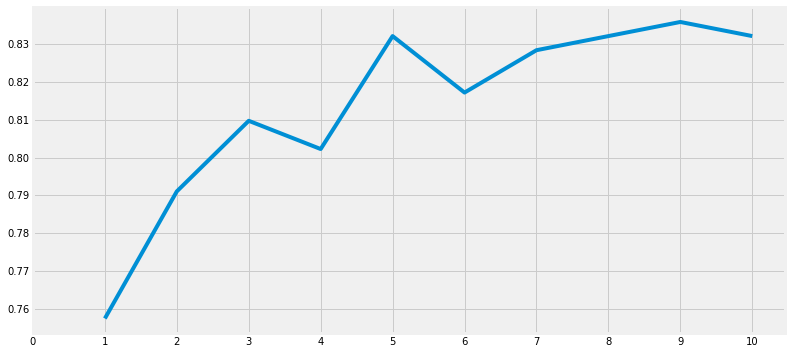

Accuracy for different values of n are: [ 0.75746269  0.79104478  0.80970149  0.80223881  0.83208955  0.81716418
  0.82835821  0.83208955  0.8358209   0.83208955]
The max value: 0.835820895522388


In [52]:
#Adjust KNN model as the model are affected by various values of 'n_neightbours'
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()
print(f"Accuracy for different values of n are: {a.values}")
print(f"The max value: {a.values.max()}")

In [53]:
#Model 6: Gaussian Naive Bayes
model = GaussianNB() #model building
model.fit(train_X, train_Y) #fitting
prediction_6 = model.predict(test_X) #predicting

print(f"Accuracy of NaiveBayes: {metrics.accuracy_score(prediction_6, test_Y)}")

Accuracy of NaiveBayes: 0.8134328358208955


In [54]:
#Model 7: Random Forests
model = RandomForestClassifier(n_estimators=100) #model building
model.fit(train_X, train_Y) #fitting
prediction_7 = model.predict(test_X) #predicting

print(f"Accuracy of Random Forest: {metrics.accuracy_score(prediction_7, test_Y)}")

Accuracy of Random Forest: 0.8134328358208955


### K-Fold Cross Validation

In [55]:
#To test the algorihms, conduct K-Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22) #k=10

xyz=list()
accuracy=list()
std=list()

classifiers=['Linear Svm', \
             'Radial Svm', \
             'Logistic Regression', \
             'KNN', \
             'Decision Tree', \
             'Naive Bayes', \
             'Random Forest']

models=[svm.SVC(kernel='linear'), \
        svm.SVC(kernel='rbf'), \
        LogisticRegression(), \
        KNeighborsClassifier(n_neighbors=9), \
        DecisionTreeClassifier(), \
        GaussianNB(), \
        RandomForestClassifier(n_estimators=100)]

for i in models: 
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy") #conduct the cross validation to all models
    cv_reslt = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)

new_models_dataframe2


,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.803633,0.027732
Naive Bayes,0.801386,0.028999
Random Forest,0.820437,0.029225


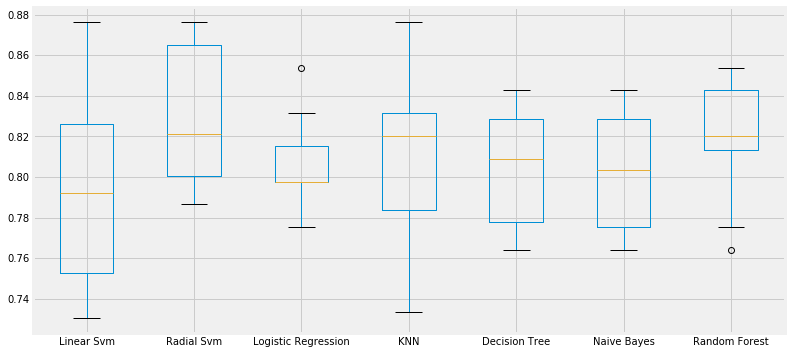

In [56]:
#Visualize the K-Fold Cross Validation result
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

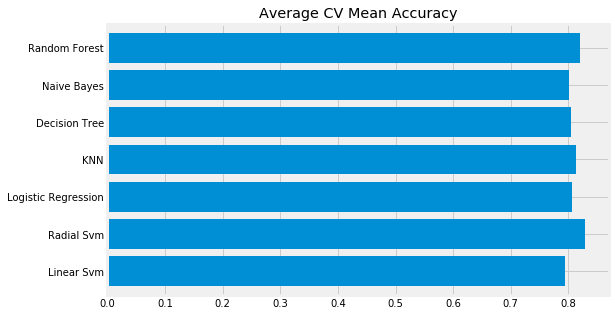

In [57]:
#Visualize the K-Fold Cross Validation result
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8, 5)

plt.show()

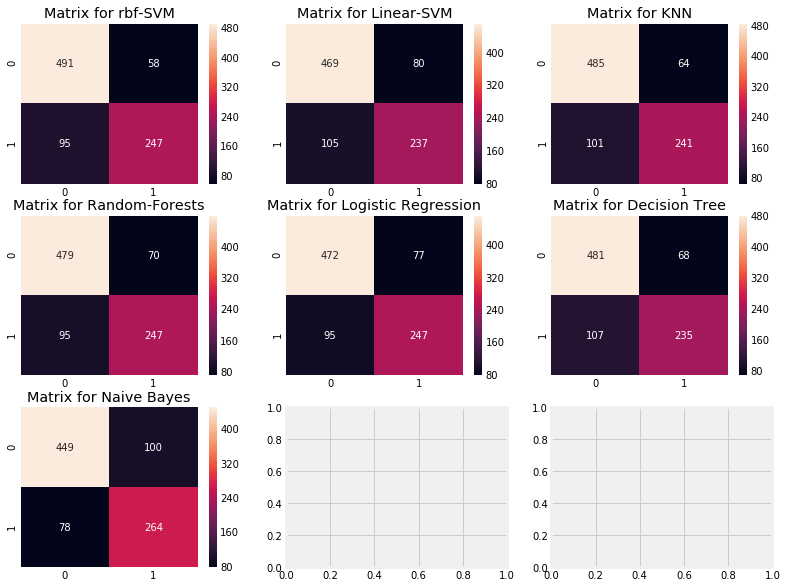

In [58]:
#To check the classification accuracy, build 'Confusion Matrix' of cross validation
f,ax=plt.subplots(3, 3, figsize=(12, 10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.show()

### Hyper-Parameters Tuning

In [59]:
#Tune the parameters of 'SVM' to see the change of learning rate of the algorithm
#This will help us to get a better model
from sklearn.model_selection import GridSearchCV

C=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] #candiates of C
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #candidates of gamma
kernel=['rbf', 'linear']
hyper={'kernel': kernel, 'C': C, 'gamma': gamma} #iinclude the candidates into the hyper

gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   15.4s finished


In [60]:
#Tune the parameters of 'Random Forest' to see the change of learning rate of the algorithm
n_estimators = range(100, 1000, 100) #candiates
hyper = {'n_estimators': n_estimators} #include the candidates into the hyper

gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   23.1s finished


0.817059483726
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


### Ensembling

In [61]:
#Combine several models, using 'Voting Classifier', one of the methods of Ensembling
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)), \
                                                ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)), \
                                                ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)), \
                                                ('LR',LogisticRegression(C=0.05)), \
                                                ('DT',DecisionTreeClassifier(random_state=0)), \
                                                ('NB',GaussianNB()), \
                                                ('svm',svm.SVC(kernel='linear',probability=True))], \
                                                voting='soft').fit(train_X, train_Y)
print(f"The accuracy of ensembled model: {ensemble_lin_rbf.score(test_X, test_Y)}")

cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print(f"The cross validated score: {cross.mean()}")

    

The accuracy of ensembled model: 0.8246268656716418
The cross validated score: 0.8237660310974917


In [62]:
#Combine several models, using 'Bagging', one of the methods of Ensembling
#Bagging works well with the models which have high variances.
#Let's using KNN with small value of n_neighbors
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)

prediction = model.predict(test_X)
print(f"The accuracy for bagged KNN: {metrics.accuracy_score(prediction, test_Y)}")

result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f"The cross validated score for bagged KNN: {result.mean()}")


The accuracy for bagged KNN: 0.835820895522388
The cross validated score for bagged KNN: 0.8148893428668709


In [63]:
#Bagging works well with Decision Tree
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)

prediction = model.predict(test_X)
print(f"The accuracy for bagged Decision Tree: {metrics.accuracy_score(prediction, test_Y)}")

result = cross_val_score(model, X, Y, scoring='accuracy')
print(f"The cross validated score for bagged Decision Tree: {result.mean()}")

The accuracy for bagged Decision Tree: 0.8246268656716418
The cross validated score for bagged Decision Tree: 0.8148148148148149


In [64]:
#'Boosting' is the technique of the ensembling, to enhance a weak model
#AdaBoost(Adaptive Boosting) is one of the 'Boosting' methods
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print(f"The cross validated score for AdaBoost: {result.mean()}")

The cross validated score for AdaBoost: 0.8249526160481218


In [65]:
#Gradient Bossing is also one of the 'Boosting' methods
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print(f"The cross validated score for Gradient Boosting: {result.mean()}")

The cross validated score for Gradient Boosting: 0.8182862331176939


In [66]:
#XGBoost is also one of the 'Boosting' methods
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print(f"The cross validated score for XGBoost: {result.mean()}")

The cross validated score for XGBoost: 0.8104710021563954


In [67]:
#As 'AdaBoost' has a highest score, tune it
n_estimators=list(range(100, 1100, 100))
learn_rate=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper={'n_estimators': n_estimators,'learning_rate': learn_rate}

gd=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  5.8min finished


0.83164983165
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


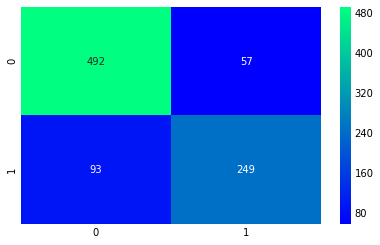

In [68]:
#Visualize the Best model with the confustion matrix
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)

sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

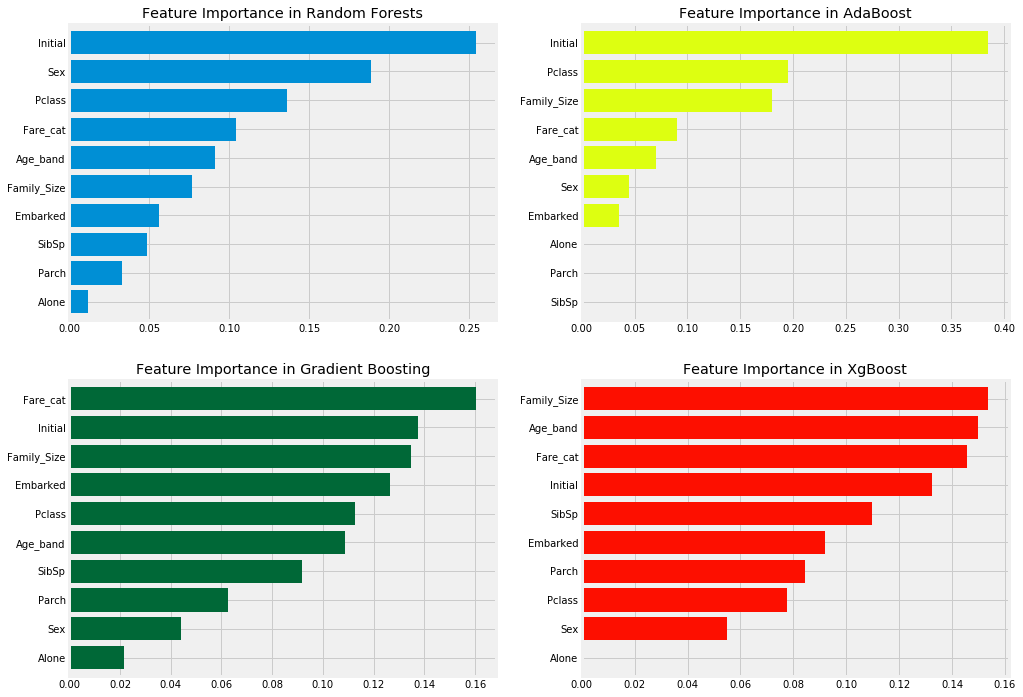

In [69]:
f,ax=plt.subplots(2, 2, figsize=(15, 12))

model=RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()